In [ ]:
# data analysis
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# scaling and train test split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# creating a model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

# evaluation on test data
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/house prediction/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
# No missing values
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

###What are the data types for various features?

Five features are floats, fifteen are integers and one is an object.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

What is the distribution of numerical feature values across the samples?

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.400881e+05,3.671272e+05,7.500000e+04,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21613.0,3.370842e+00,9.300618e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21613.0,2.114757e+00,7.701632e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21613.0,2.079900e+03,9.184409e+02,2.900000e+02,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21613.0,1.510697e+04,4.142051e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06
floors,21613.0,1.494309e+00,5.399889e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21613.0,7.541757e-03,8.651720e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21613.0,2.343034e-01,7.663176e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21613.0,3.409430e+00,6.507430e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


<AxesSubplot:title={'center':'Correlation Matrix'}>

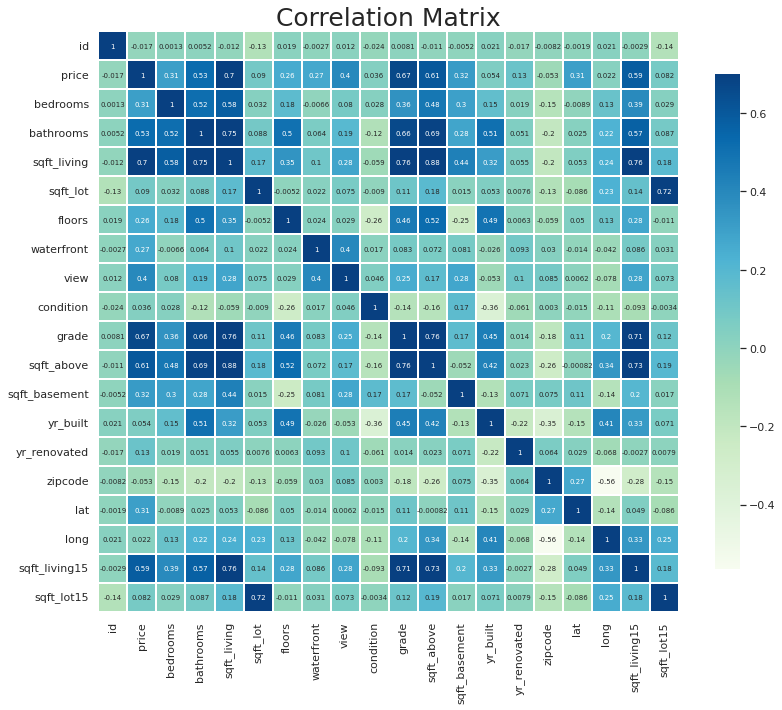

In [ ]:
sns.set(style="whitegrid", font_scale=1)

plt.figure(figsize=(13,13))
plt.title('Correlation Matrix',fontsize=25)
sns.heatmap(df.corr(),linewidths=0.25,vmax=0.7,square=True,cmap="GnBu",linecolor='w',
            annot=True, annot_kws={"size":7}, cbar_kws={"shrink": .7})

###Price correlation
* This allow us to explore labels that are highly correlated to the price.
* sqft_living looks like a highly correlated label to the price, as well as grade, sqft_above, sqft_living15 and bathrooms

In [ ]:
price_corr = df.corr()['price'].sort_values(ascending=False)
print(price_corr)

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
id              -0.016762
zipcode         -0.053203
Name: price, dtype: float64


## Price feature
* Most of the house prices are between $0 and $1,500,000.
* The average house price is $540,000.

* Keep in mind that it may be a good idea to drop extreme values. For instance, we could focus on house from $0 to $3,000,000 and drop the other ones.
* It seems that there is a positive linear relationship between the price and sqft_living.
* An increase in living space generally corresponds to an increase in house price.

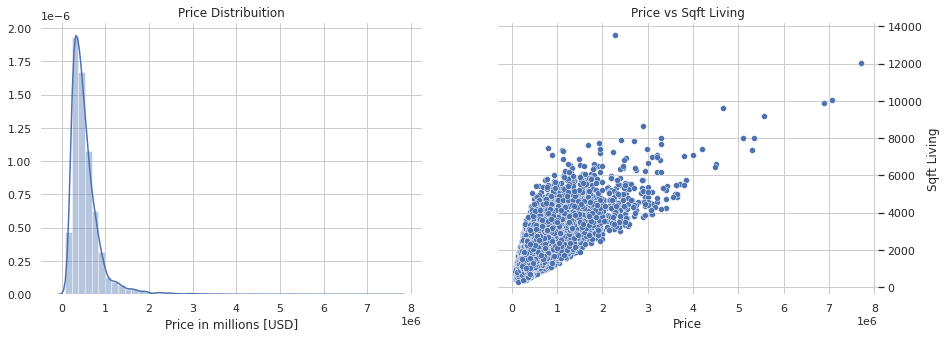

In [ ]:
f, axes = plt.subplots(1, 2,figsize=(15,5))
sns.distplot(df['price'], ax=axes[0])
sns.scatterplot(x='price',y='sqft_living', data=df, ax=axes[1])
sns.despine(bottom=True, left=True)
axes[0].set(xlabel='Price in millions [USD]', ylabel='', title='Price Distribuition')
axes[1].set(xlabel='Price', ylabel='Sqft Living', title='Price vs Sqft Living')
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()

###Bedrooms and floors box plots
* We can see outliers plotted as individual points; this probably are the more expensive houses.
* We can see that the price tends to go up when the house has more bedrooms.

[Text(0.5, 0, 'Floors'),
 Text(0, 0.5, 'Price'),
 Text(0.5, 1.0, 'Floors vs Price Box Plot')]

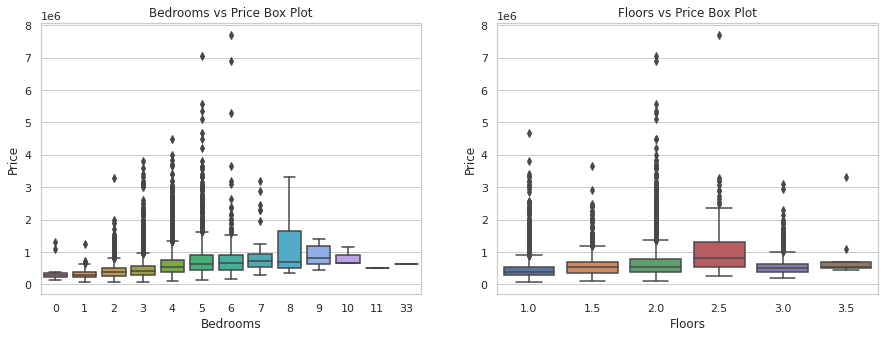

In [ ]:
sns.set(style="whitegrid", font_scale=1)
f, axes = plt.subplots(1, 2,figsize=(15,5))
sns.boxplot(x=df['bedrooms'],y=df['price'], ax=axes[0])
sns.boxplot(x=df['floors'],y=df['price'], ax=axes[1])
axes[0].set(xlabel='Bedrooms', ylabel='Price', title='Bedrooms vs Price Box Plot')
axes[1].set(xlabel='Floors', ylabel='Price', title='Floors vs Price Box Plot')

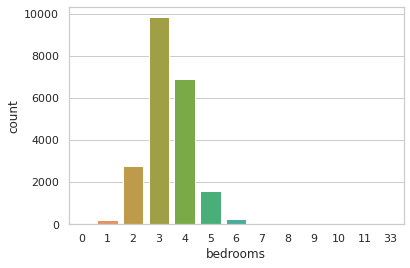

In [ ]:
sns.countplot(df['bedrooms'])
plt.show()

### Waterfront, view and grade box plots
* Waterfront houses tends to have a better price value.
* The price of waterfront houses tends to be more disperse and the price of houses without waterfront tend to be more concentrated.
* Grade and waterfront effect price. View seem to effect less but it also has an effect on price

[Text(0.5, 0, 'Grade'),
 Text(0, 0.5, 'Price'),
 Text(0.5, 1.0, 'Grade vs Price Box Plot')]

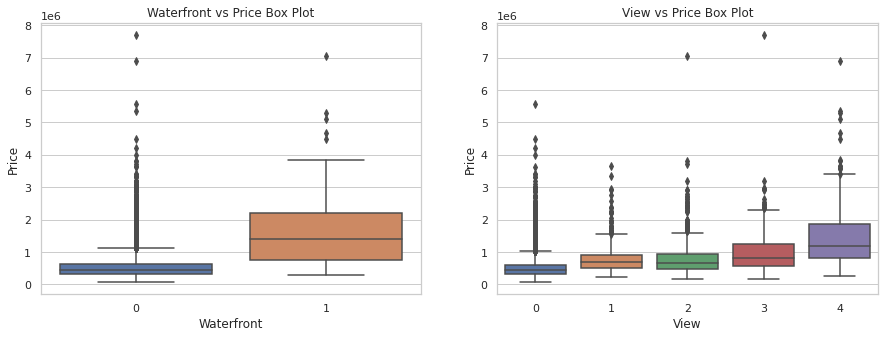

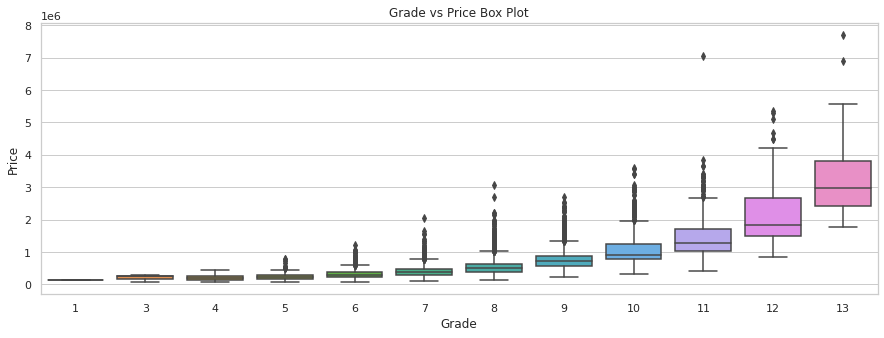

In [ ]:
f, axes = plt.subplots(1, 2,figsize=(15,5))
sns.boxplot(x=df['waterfront'],y=df['price'], ax=axes[0])
sns.boxplot(x=df['view'],y=df['price'], ax=axes[1])
axes[0].set(xlabel='Waterfront', ylabel='Price', title='Waterfront vs Price Box Plot')
axes[1].set(xlabel='View', ylabel='Price', title='View vs Price Box Plot')

f, axe = plt.subplots(1, 1,figsize=(15,5))
sns.boxplot(x=df['grade'],y=df['price'], ax=axe)
axe.set(xlabel='Grade', ylabel='Price', title='Grade vs Price Box Plot')

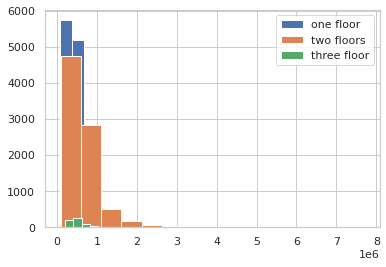

In [ ]:
one = plt.hist(df[(df.floors == 1) | (df.floors ==1.5) ].price ,bins =15 ,label = "one floor")
two = plt.hist(df[(df.floors == 2) | (df.floors == 2.5)].price ,bins =15 ,label = "two floors")
three = plt.hist(df[(df.floors ==3) | (df.floors == 3.5)].price ,bins =15 ,label = "three floor")
plt.legend()

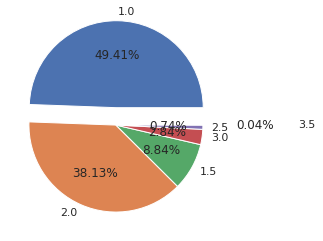

In [ ]:
plt.pie(df.floors.value_counts(normalize =True) , explode =[0.2,0,0,0,0,1] ,labels =df.floors.value_counts().index,
        autopct ="%.2f%%"
       )
plt.show()

<AxesSubplot:xlabel='waterfront', ylabel='price'>

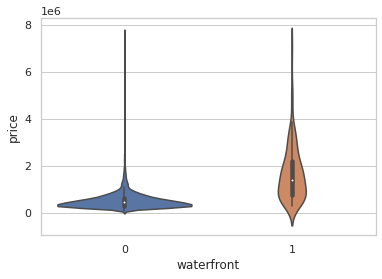

In [ ]:
sns.violinplot(data =df,x = "waterfront" ,y ="price")

Text(0.5, 1.0, "Condition's count")

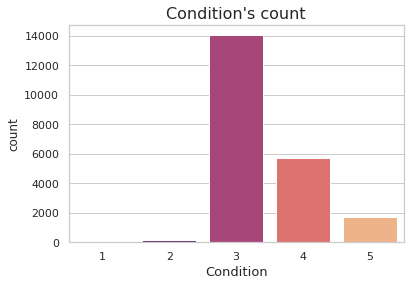

In [ ]:
sns.countplot(x='condition', data=df, palette='magma')
plt.xlabel('Condition', fontsize=13)
plt.title("Condition's count", fontsize=16)

In [ ]:
df = df.drop(['id','zipcode'], axis=1)

In [ ]:
df['date'] = pd.to_datetime(df['date'])

df['month'] = df['date'].apply(lambda date:date.month)
df['year'] = df['date'].apply(lambda date:date.year)

df = df.drop('date',axis=1)

# Check the new columns
print(df.columns.values)

['price' 'bedrooms' 'bathrooms' 'sqft_living' 'sqft_lot' 'floors'
 'waterfront' 'view' 'condition' 'grade' 'sqft_above' 'sqft_basement'
 'yr_built' 'yr_renovated' 'lat' 'long' 'sqft_living15' 'sqft_lot15'
 'month' 'year']


###House price trends
* Looking the box plots we notice that there is not a big difference between 2014 and 2015.
* The number of houses sold by month tends to be similar every month.
* The line plot show that around April there is an increase in house prices.

In [ ]:
X = df.drop('price',axis=1)

# Label
y = df['price']

# Split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(15129, 19)
(6484, 19)
(15129,)
(6484,)


In [ ]:
scaler = MinMaxScaler()

# fit and transfrom
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
model = Sequential()
y_size,x_size = X_train.shape
model.add(Dense(x_size,activation='relu')) # x_size - 64 - 64 - 128 - 64 - 64 - x_size
model.add(Dense(64,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(x_size,activation='relu'))
model.add(Dense(1)) # since we want only one feature as outcome (price) I added 1 as last dense

In [ ]:
model.compile(optimizer='adam',loss='mae')

In [ ]:
history = model.fit(
    x= X_train,
    y= y_train,
    batch_size=128,
    epochs=400,
    validation_data=(X_test, y_test))

Epoch 1/400
119/119 [==============================] - 3s 7ms/step - loss: 503213.8125 - val_loss: 191691.9219
Epoch 2/400
119/119 [==============================] - 1s 5ms/step - loss: 184449.7188 - val_loss: 175657.5781
Epoch 3/400
119/119 [==============================] - 1s 4ms/step - loss: 164390.9062 - val_loss: 153692.2656
Epoch 4/400
119/119 [==============================] - 1s 4ms/step - loss: 140251.1094 - val_loss: 130105.7344
Epoch 5/400
119/119 [==============================] - 1s 5ms/step - loss: 126404.7266 - val_loss: 123164.7891
Epoch 6/400
119/119 [==============================] - 1s 5ms/step - loss: 122285.1094 - val_loss: 121809.5781
Epoch 7/400
119/119 [==============================] - 1s 5ms/step - loss: 119705.0469 - val_loss: 117976.6641
Epoch 8/400
119/119 [==============================] - 1s 9ms/step - loss: 117546.2344 - val_loss: 118447.5625
Epoch 9/400
119/119 [==============================] - 1s 8ms/step - loss: 116241.9219 - val_loss: 115004.2812
E

In [ ]:
pd.DataFrame(history.history)

,loss,val_loss
0,503213.812500,191691.921875
1,184449.718750,175657.578125
2,164390.906250,153692.265625
3,140251.109375,130105.734375
4,126404.726562,123164.789062
...,...,...
395,65770.335938,69185.695312
396,64766.621094,68780.960938
397,64486.722656,68224.406250
398,65335.511719,72006.984375


<AxesSubplot:>

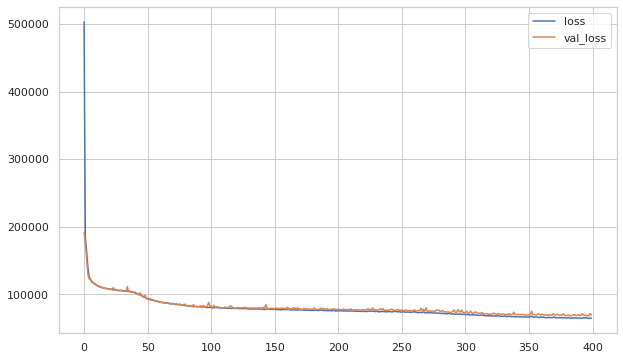

In [ ]:
pd.DataFrame(history.history).plot(figsize=(10,6))

In [ ]:
predictions=model.predict(X_test)

203/203 [==============================] - 1s 2ms/step


In [ ]:
print("The absolute mean error :",mean_absolute_error(y_test, predictions))
print("The r2_score :",r2_score(y_test, predictions))

The absolute mean error : 69330.98467863201
The r2_score : 0.8919096133989508


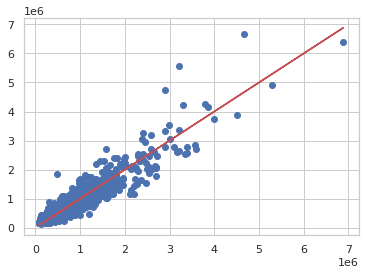

In [ ]:
plt.scatter(y_test,predictions)
plt.plot(y_test,y_test,'r')

In [ ]:
pd.DataFrame({"Actual value":y_test.astype(int),"predicted value":predictions.flatten().astype(int)})

,Actual value,predicted value
3834,349950,290477
1348,450000,446531
20366,635000,849185
16617,355500,342151
20925,246950,277331
...,...,...
1398,465000,443232
3364,418000,388054
18958,394250,429770
17845,249500,212841
